### Pendulum equation 

$$x''+\sin(x)=0$$   


In [60]:
t = var("t")
x = function("x")(t)    
pendulum_eq = diff(x,t,2) + sin(x) == 0
pendulum_eq

sin(x(t)) + diff(x(t), t, t) == 0

In [61]:
solution = desolve(pendulum_eq, dvar=x, ivar=t)
solution

[-integrate(1/sqrt(-2*_K1 + 2*cos(x(t))), x(t)) == _K2 + t,
 integrate(1/sqrt(-2*_K1 + 2*cos(x(t))), x(t)) == _K2 + t]

In [62]:
solution = desolve(pendulum_eq, dvar=x, ivar=t, show_method=True)
solution

[[-integrate(1/sqrt(-2*_K1 + 2*cos(x(t))), x(t)) == _K2 + t,
  integrate(1/sqrt(-2*_K1 + 2*cos(x(t))), x(t)) == _K2 + t],
 'freeofx']

### Sistema equivalente

$$\begin{cases} x'=y \\ y'=-\sin(x) \end{cases}$$

In [63]:
t,x,y = var("t,x,y")
xt = y 
yt = -sin(x)

vf = vector([xt, yt])
vf 

(y, -sin(x))

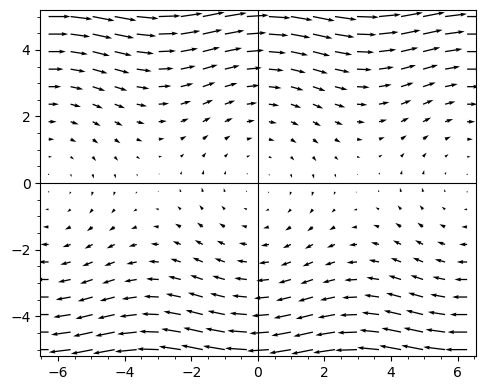

In [64]:
g = Graphics()

g += plot_vector_field(vf, (x, -2*pi, 2*pi), (y, -5, 5), aspect_ratio=1)
g.show()

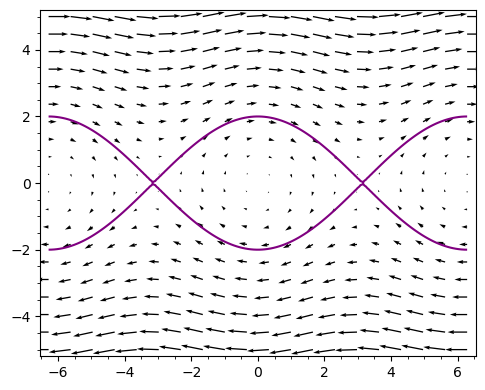

In [65]:
separatrix = y^2==2*cos(x)+2
g += implicit_plot(separatrix, (x,-2*pi,2*pi), (y,-2,2), color = "purple")
g.show()

In [66]:
crit_points = solve([xt==0, yt==0], x, y)
crit_points

[[x == pi*z138538, y == 0]]

[x == pi*z138538, y == 0]
unable to simplify to complex approximation


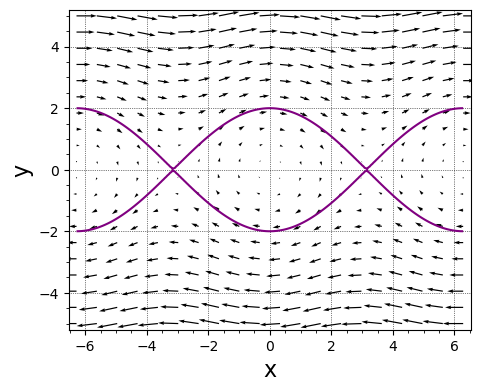

In [67]:
for point in crit_points:
    try:
        g += point2d(point, color='red', pointsize=30)
    except Exception as e:
        print(point)
        print(e)

# Show the plot
g.show(gridlines=True, axes_labels=['x', 'y'], xmin=-2*pi, xmax=2*pi, ymin=-5, ymax=5)

In [68]:
import numpy as np

initial_conditions = [(N(i), N(j)) for i in np.linspace(-2*np.pi,2*np.pi,11) for j in np.linspace(-5,5,11)]

for ic in initial_conditions:
    try:
        sol = desolve_system_rk4(vf, [x, y], ics=[0, ic[0], ic[1]], ivar=t, end_points=10, step=0.1)
        Q = [[j,k]  for i,j,k in sol]
        g+=list_plot(Q, plotjoined=True, color="pink",  alpha=0.1 )+point2d(ic, color='green', pointsize=10)
    except Exception as e:
        print(e)

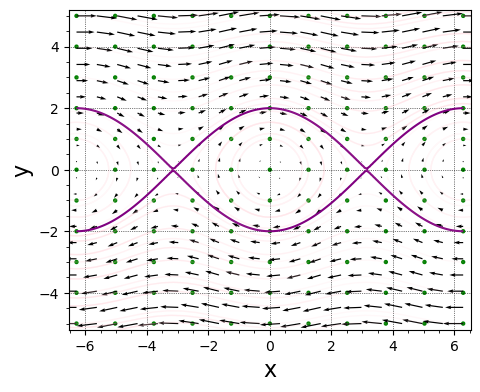

In [69]:

g.show(gridlines=True, axes_labels=['x', 'y'], xmin=-2*pi, xmax=2*pi, ymin=-5, ymax=5)